In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getExtents(a,b,numRows, numCols):
    r1 = int(0)
    c1 = int(a*r1+b)
    r2 = int(numRows-1)
    c2 = int(a*r2+b)
    return (c1, r1), (c2, r2)

# Hough Transform

In [3]:
def houghLines(E):
    angles = np.deg2rad(np.arange(360))
    numRows, numCols = E.shape[0], E.shape[1]
    dMax = int((numRows**2 + numCols**2)**0.5)
    # Voting Array: It starts empty
    H = np.zeros((dMax, len(angles)))
    idx = np.argwhere(E)
    r,c = idx[:,0], idx[:,1]

    for i in range(len(r)):
        for ang in angles:
            ri,ci = r[i], c[i]
            di = int(ri*np.cos(ang) + ci*np.sin(ang))
            # If result is within boundaries, add a vote for that line
            if di > 0  and di < dMax:
                H[di, int(np.rad2deg(ang))] += 1
    return H


In [4]:
E = cv.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 10\E.png', cv.IMREAD_GRAYSCALE)

In [5]:
E.min(), E.max(), E.dtype

(0, 255, dtype('uint8'))

In [6]:
E = E>100

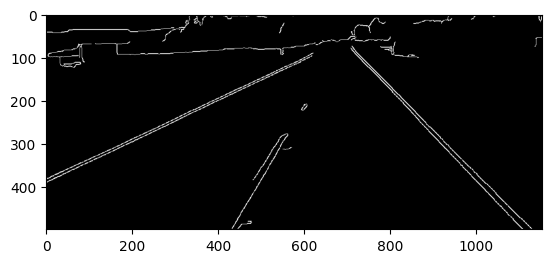

In [7]:
plt.imshow(E, cmap='gray')

In [8]:
E.shape, E.dtype

((499, 1153), dtype('bool'))

In [9]:
H = houghLines(E)

In [10]:
idx = np.argwhere(H==H.max())
best_d, best_theta = idx[0,0], idx[0,1]

In [11]:
best_d, best_theta

(346, 25)

# Parameters Conversion

In [12]:
theta = np.deg2rad(best_theta)
a = -(1/np.tan(theta))
b = best_d/np.sin(theta)

In [13]:
a,b

(-2.1445069205095586, 818.7057477707644)

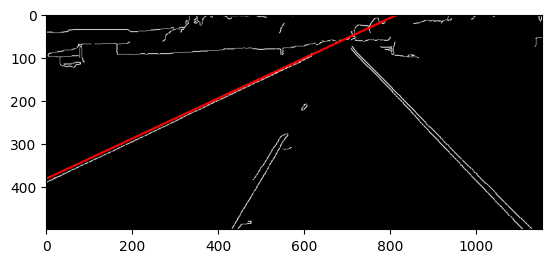

In [14]:
s, e = getExtents(a, b, E.shape[0], E.shape[1])
E2 = np.zeros((E.shape[0], E.shape[1], 3), dtype=np.uint8)
E3 = np.array(E*255, np.uint8)

E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv.line(E2, s, e, (0,0,255), 3)
plt.imshow(I[:,:,::-1])

# Circles

In [16]:
def houghCircles(E):
    angles = np.deg2rad(np.arange(360))
    numRows, numCols = E.shape[0], E.shape[1]
    dMax = int((numRows**2 + numCols**2)**0.5)
    # Voting Array: It starts empty
    H = np.zeros((numRows, numCols, dMax))
    idx = np.argwhere(E)
    r,c = idx[:,0], idx[:,1]
    for i in range(len(r)):
        for a in range(numRows):
            for b in range(numCols):
                ri,ci = r[i], c[i]
                di = int(((ri-a)**2 + (ci-b)**2)**0.5)
                # If result is within boundaries, add a vote for that line
                if di > 0  and di < dMax:
                    H[a, b, di] += 1
    return H


In [17]:
E = cv.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 10\Ec.png', cv.IMREAD_GRAYSCALE)

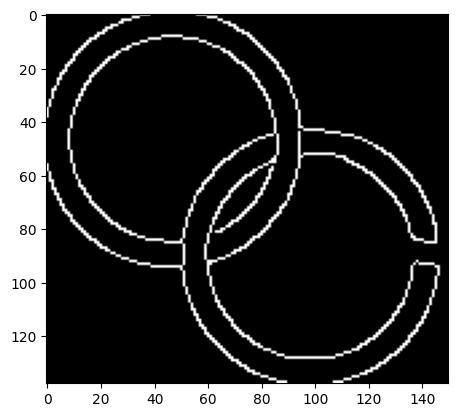

In [18]:
E = E>100
plt.imshow(E, cmap='gray')

In [19]:
H = houghCircles(E)

In [20]:
idx = np.argwhere(H==H.max())
best_cr, best_cc, best_d = idx[0,0], idx[0,1], idx[0,2]

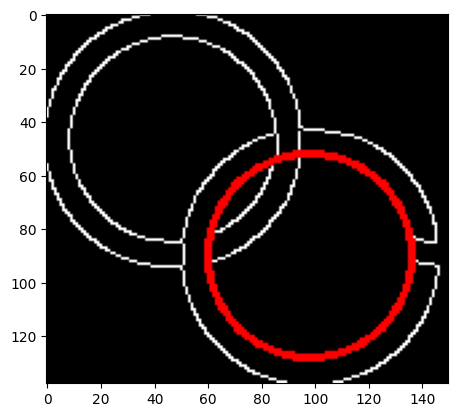

In [21]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])